# Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Charger le fichier CSV

In [2]:
df = pd.read_csv('disney.csv')

# Afficher les premières lignes du dataset pour comprendre sa structure

In [3]:
print(df.head())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough

# 1. Top 5 des meilleures catégories

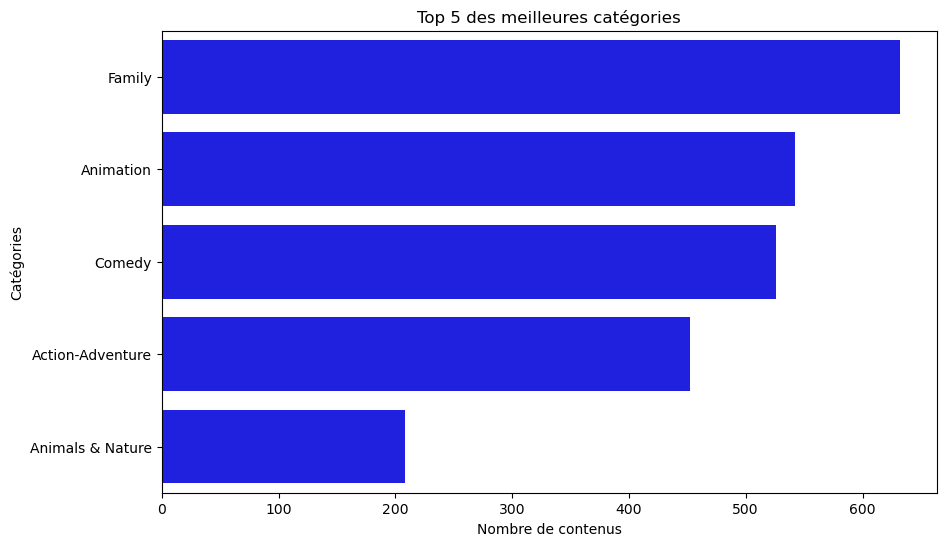

In [4]:
categories = df['listed_in'].str.split(', ').explode().value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=categories.values, y=categories.index, color='blue')
plt.title('Top 5 des meilleures catégories')
plt.xlabel('Nombre de contenus')
plt.ylabel('Catégories')
plt.show()

# 2. Top 5 des réalisateurs

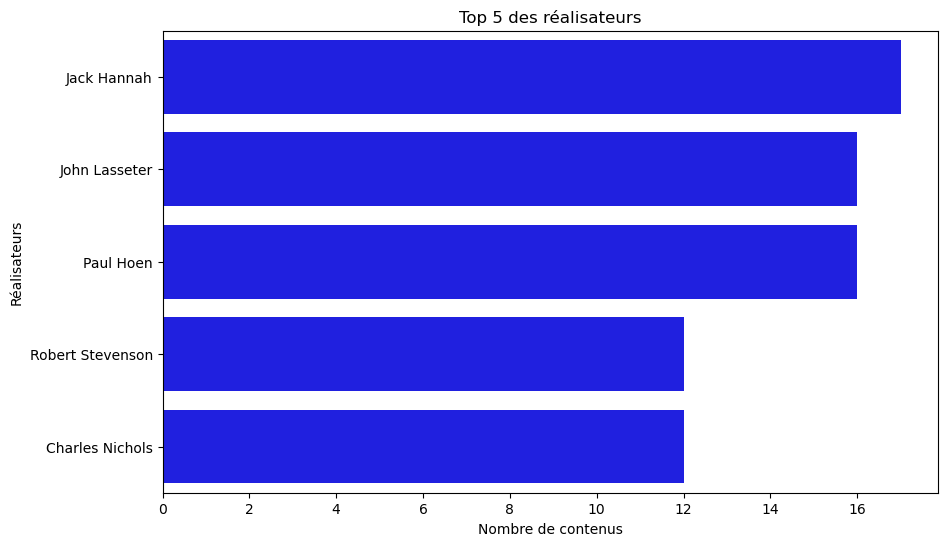

In [5]:
top_directors = df['director'].dropna().value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, color='blue')
plt.title('Top 5 des réalisateurs')
plt.xlabel('Nombre de contenus')
plt.ylabel('Réalisateurs')
plt.show()

# 3. Les dix meilleurs acteurs

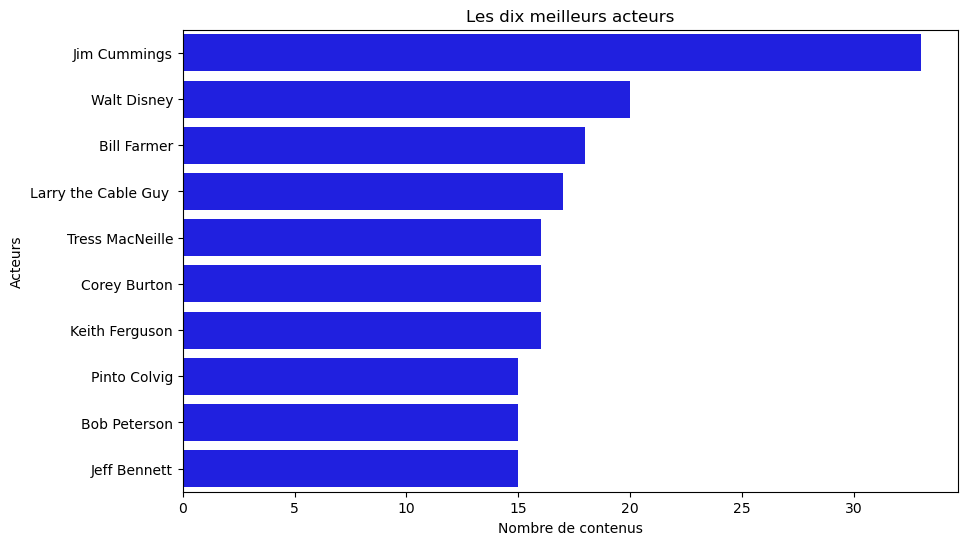

In [6]:
top_actors = df['cast'].dropna().str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, color='blue')
plt.title('Les dix meilleurs acteurs')
plt.xlabel('Nombre de contenus')
plt.ylabel('Acteurs')
plt.show()


# 4. Les cinq meilleures séries télévisées avec le plus grand nombre de saisons

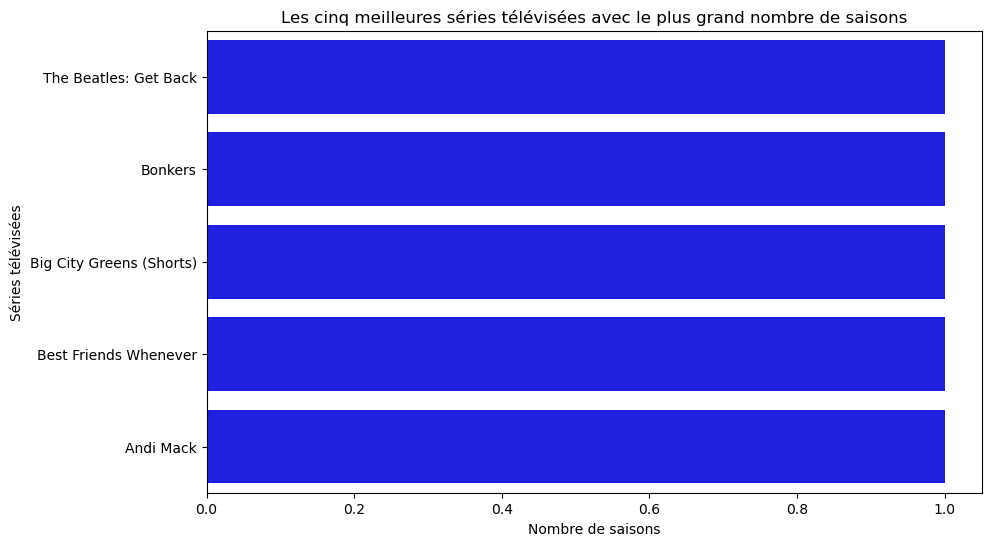

In [7]:
tv_shows = df[df['type'] == 'TV Show']
top_tv_shows = tv_shows['title'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tv_shows.values, y=top_tv_shows.index, color='blue')
plt.title('Les cinq meilleures séries télévisées avec le plus grand nombre de saisons')
plt.xlabel('Nombre de saisons')
plt.ylabel('Séries télévisées')
plt.show()

# 5. Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'].dropna())
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
similar_indices = cosine_similarities[0].argsort()[:-6:-1]
similar_items = [(df['title'].iloc[i], cosine_similarities[0][i]) for i in similar_indices]
print("Contenus similaires au premier contenu:")
for item in similar_items:
    print(item)

Contenus similaires au premier contenu:
('Duck the Halls: A Mickey Mouse Christmas Special', 1.0)
("Mickey's Birthday Party", 0.2511588462541223)
('Toy Story of Terror!', 0.2508593966404532)
('Toy Story 2', 0.23492254574880356)
('Lonesome Ghosts', 0.2272716910863365)


# 6. Netflix/Amazon/Disney se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

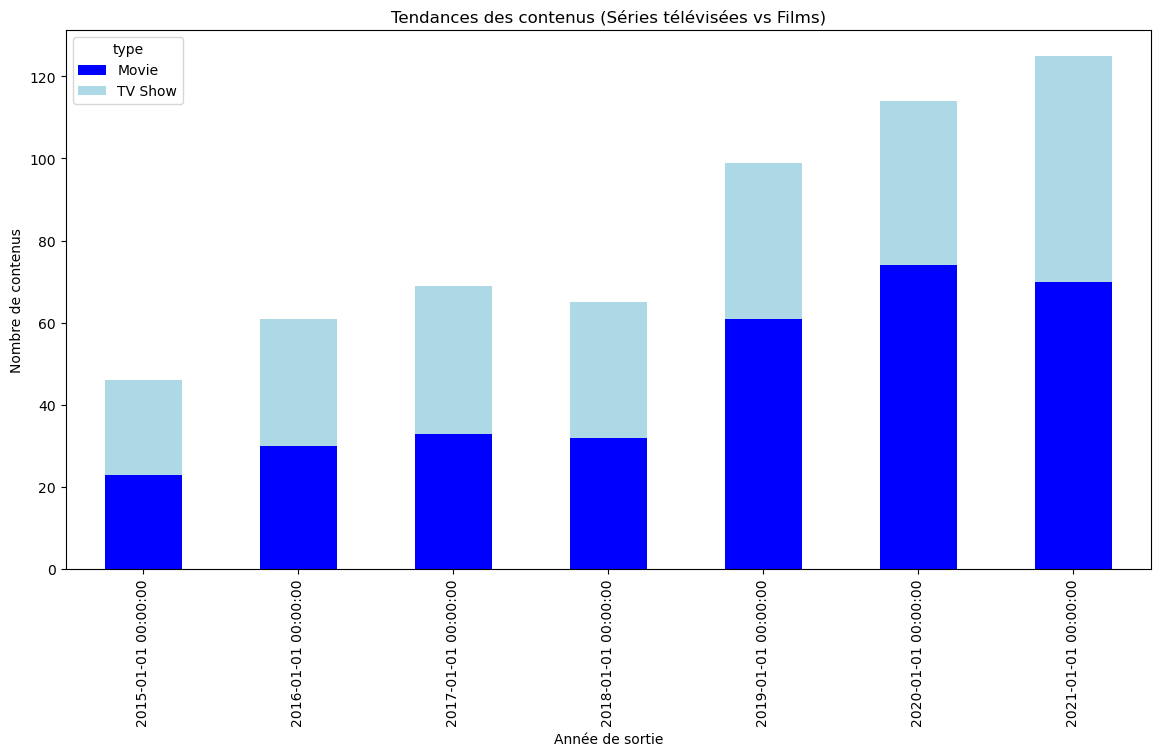

In [10]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
recent_years = df[df['release_year'] >= pd.to_datetime('2015', format='%Y')]
content_trends = recent_years.groupby(['release_year', 'type']).size().unstack().fillna(0)
content_trends.plot(kind='bar', stacked=True, figsize=(14, 7), color=['blue', 'lightblue'])
plt.title('Tendances des contenus (Séries télévisées vs Films)')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de contenus')
plt.show()